In [153]:
from MARS.common.chem import *
from MARS.datasets.utils import *
from rdkit import Chem 
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 900,300

In [177]:
from rdkit.Chem.Draw import rdMolDraw2D

def draw_mol(mol, file_name) :
    d = rdMolDraw2D.MolDraw2DCairo(400, 400) # or MolDraw2DSVG to get SVGs
    d.drawOptions().addStereoAnnotation = True
    d.drawOptions().addAtomIndices = True
    d.DrawMolecule(mol)
    d.FinishDrawing()

    d.WriteDrawingText(file_name)

In [93]:
def combine_mol(mol1,u,mol2,v) :
    mol = Chem.CombineMols(mol1, mol2)
    mol = Chem.RWMol(mol)
    u = u
    v = mol1.GetNumAtoms() + v
    mol.AddBond(u, v, Chem.rdchem.BondType.SINGLE)
    M = mol.GetMol()
    Chem.SanitizeMol(M)
    return M

In [94]:
mol1 =  Chem.MolFromSmiles('COC1CCC(C(=O)Nc2cc(-c3ccnc(Nc4ccc(F)cc4)c3)ccn2)CC1')
mol2 = Chem.MolFromSmiles('CNc1nccc(C(C#N)c2nc3ccccc3s2)n1')

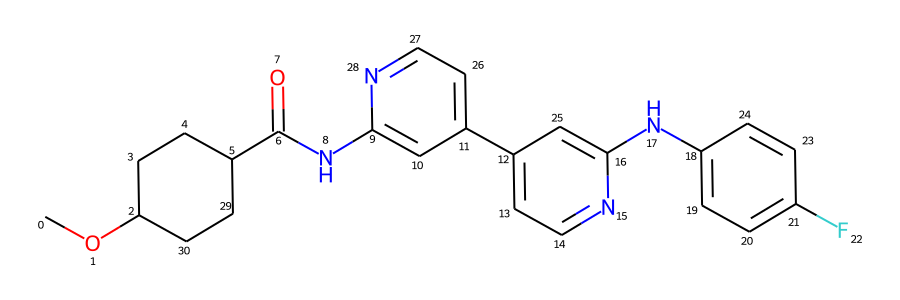

In [95]:
mol1

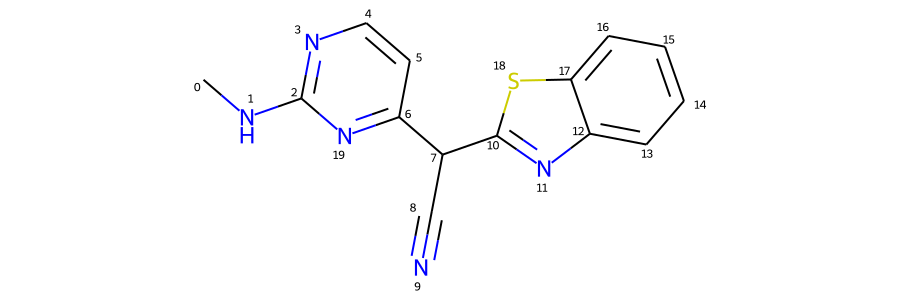

In [96]:
mol2

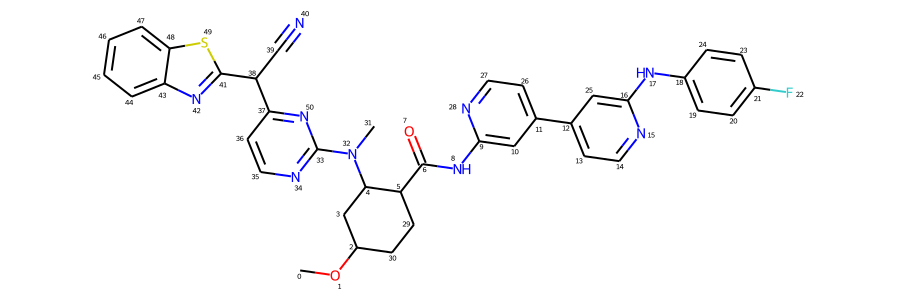

In [97]:
M = combine_mol(mol1,4,mol2,1)
M

In [132]:
def break_bond_mol(mol, u, v):
    '''
    break a bond in the molecule

    @params:
        mol : molecule of Chem.Mol
        u   : atom index on the skeleton
        v   : atom index on the arm
    @return:
        skeleton : molecule skeleton that contains u (w/o the virtual bond)
        arm      : molecule arm that contains v (with the virtual bond)
    '''
    mol = Chem.RWMol(copy.deepcopy(mol))
    bond = mol.GetBondBetweenAtoms(u, v)
    bond_type = bond.GetBondType()
    if not bond_type == \
        Chem.rdchem.BondType.SINGLE:
        raise ValueError
    mol.RemoveBond(u, v)
    mapping = []
    frags = list(Chem.rdmolops.GetMolFrags(mol,
        asMols=True, fragsMolAtomMapping=mapping))
    mapping = [list(m) for m in mapping]
    if len(mapping)==1 :
        M = mol.GetMol()
        Chem.SanitizeMol(M)
        return M 
    
    elif len(mapping)==2:
        if u not in mapping[0]:
            mapping = [mapping[1], mapping[0]]
            frags = [frags[1], frags[0]]
        
        u = mapping[0].index(u) 
        v = mapping[1].index(v)
        M = frags[0]
        Chem.SanitizeMol(M)
        return M
        
    else :
        raise ValueError
    

#     mapping = []
#     frags = list(Chem.rdmolops.GetMolFrags(mol,
#         asMols=True, fragsMolAtomMapping=mapping))
#     mapping = [list(m) for m in mapping]
#     if not len(frags) == 2: raise ValueError
#     

#     # re-index
#     u = mapping[0].index(u) 
#     v = mapping[1].index(v)
    
#     # standardizing frags will cause wrong indexing for u and v
#     skeleton = Skeleton(frags[0], u, bond_type)
#     arm = Arm(frags[1], v, bond_type)
#     return skeleton, arm

In [133]:
break_bond_mol(M,41,49)

AROMATIC


ValueError: 

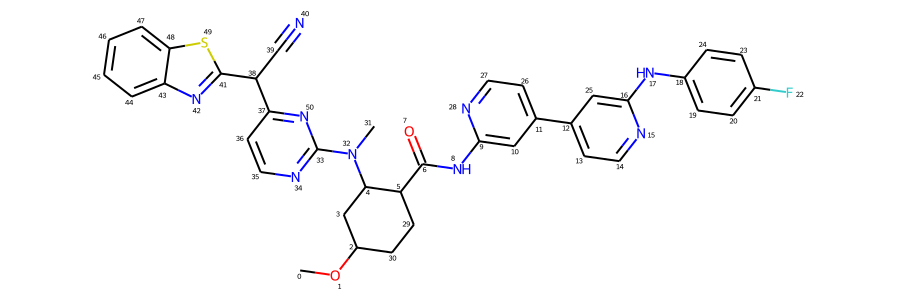

In [127]:
M

In [152]:
g = mol_to_dgl(M)
edges = g.all_edges()
for i in torch.nonzero(g.edata['e_feat'].argmax(dim=-1)==0, as_tuple=True)[0]:
    index = i.item()
    u = edges[0][index].item()
    v = edges[1][index].item()
    break_bond_mol(M,u,v)

SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE
SINGLE


In [159]:
vocab = load_vocab('MARS/data','chembl', 1000000)

loaded vocab of size 81752


In [173]:
g = mol_to_dgl(M)
avalaible_atom = torch.nonzero(g.ndata['n_feat'][:,-1]>0,as_tuple=True)[0]

In [ ]:
for i,arm in enumerate(vocab.arms):
    path = 'arms/arm_idx_{}.jpg'.format(i)
    draw_mol(arm.mol,path)
        

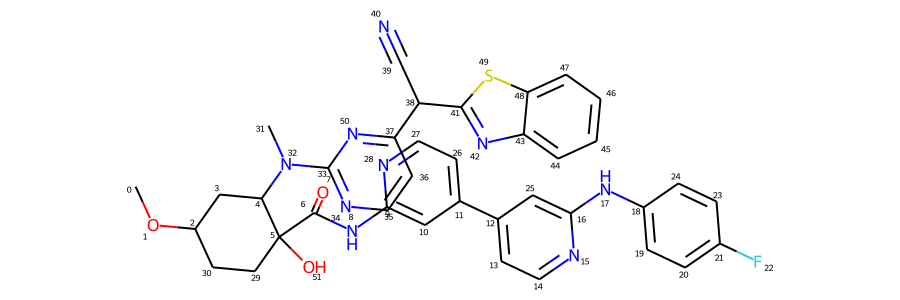

In [204]:
arm = vocab.arms[0]
combine_mol(M,5,arm.mol,arm.v)

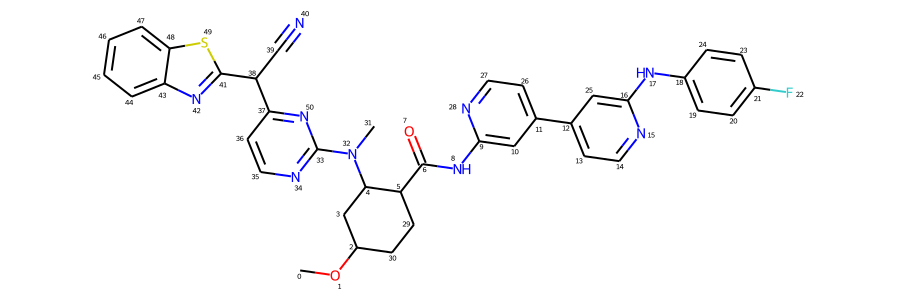

In [205]:
M

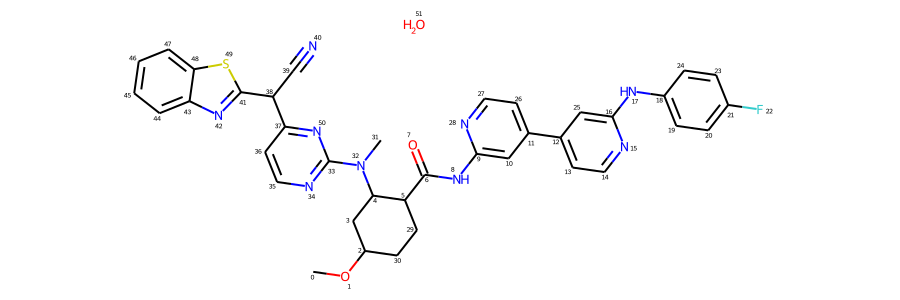

In [206]:
c = Chem.CombineMols(M, arm.mol)
c

In [207]:
c = Chem.RWMol(c)
u = 5
v = M.GetNumAtoms() + 0
c.AddBond(u, v, Chem.rdchem.BondType.SINGLE)

58

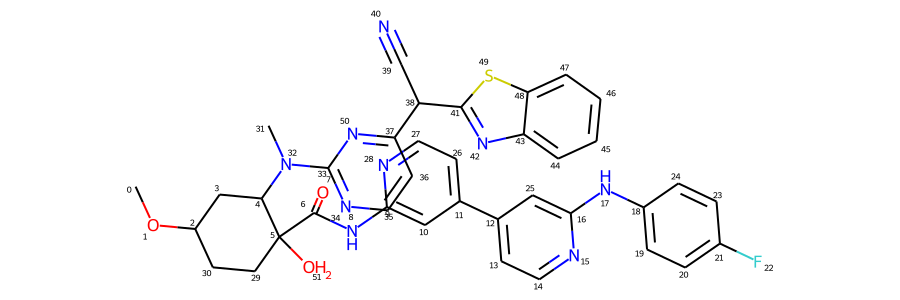

In [208]:
c